In [159]:
source('preprocess2.R')  # load behavior data
require(tidyverse) # tidy data
require(broom) # tidy model
require(repr) # adjust figure
require(nnet) # logistic regression

Loading required package: broom


# Load demo dataset

In [2]:
dataTest <- loadData('../raw data/20190430gfc/rat_hf0_test.txt')

[1] "trialNum: 323 pulseDur: 0 punishment: 5000 stage: 5 blockLength: 100 reward: 24 direction: l blockNumber: 3 baseline: 20 stopPercent: 0.2 laserDur: 99 blinkerFreq: 10 laserFreq: 0 lh: 1500 sessionLength: 320 isLaser: 0 None"
[1] "DataFrame Returned"


In [3]:
dataTest

pokeInL,pokeOutL,pokeInM,pokeInR,pokeOutR,rewardStart,trialType,isRewarded,stopSignalStart,SSDs,trialsSkipped
0.00,0.00,0.00,8946.289,9206.055,0.00,1,0,0,0,32
0.00,0.00,19173.83,18556.641,18745.117,0.00,1,0,0,0,36
34235.35,34322.27,34569.34,33408.203,33753.906,34569.34,1,1,0,0,39
36647.46,36761.72,36991.21,35995.117,36055.664,36991.21,1,1,0,0,40
38927.73,39057.62,39250.00,38289.062,38524.414,39250.00,1,1,0,0,41
41796.88,41876.95,42079.10,40754.883,41018.555,42079.10,1,1,0,0,43
44562.50,44562.50,44864.26,44025.391,44136.719,44864.26,1,1,0,0,59
49069.34,49117.19,49368.16,48587.891,48682.617,49368.16,1,1,0,0,82
51882.81,51882.81,52203.12,51145.508,51307.617,52203.12,1,1,0,0,83
57860.35,57933.59,58147.46,57432.617,57552.734,58147.46,1,1,0,0,89


In [4]:
condSum<-dataTest %>% mutate(isPokeL = pokeInL > 0, isPokeM = pokeInM > 0, isPokeR = pokeInR > 0,
                             trialType = as.logical(trialType - 1), isRewarded = as.logical(isRewarded),
                             trialsSkipped = trialsSkipped > 0, stopSignalStart = stopSignalStart > 0) %>% 
    select(trialsSkipped:isPokeR,trialType:stopSignalStart) %>%
    group_by_all() %>% tally() %>% ungroup() %>% 
    complete(trialsSkipped, isPokeL, isPokeM, isPokeR,
    trialType, isRewarded, stopSignalStart, fill=list(n=0))

In [5]:
condSum %>% group_by(stopSignalStart, trialType) %>% summarise(n = sum(n))

stopSignalStart,trialType,n
FALSE,FALSE,264
FALSE,TRUE,0
TRUE,FALSE,0
TRUE,TRUE,59


__trialType=2__ (stop trial) if and only if __stopSignalStart > 0__.

In [36]:
condSum %>% group_by(trialType, isPokeM, isRewarded) %>% summarise(n = sum(n))

trialType,isPokeM,isRewarded,n
FALSE,FALSE,FALSE,1
FALSE,FALSE,TRUE,0
FALSE,TRUE,FALSE,12
FALSE,TRUE,TRUE,251
TRUE,FALSE,FALSE,21
TRUE,FALSE,TRUE,0
TRUE,TRUE,FALSE,0
TRUE,TRUE,TRUE,38


Only when __trialType=1__ (go trial) and __isPokeM > 0__, or when __trialType=2__ (stop trial) and __isPokeM = 0__, __isRewarded=1__ (was rewarded).

In [20]:
condSum %>% group_by(isRewarded, trialType, isPokeL) %>% summarise(n = sum(n))

isRewarded,trialType,isPokeL,n
FALSE,FALSE,FALSE,13
FALSE,FALSE,TRUE,0
FALSE,TRUE,FALSE,0
FALSE,TRUE,TRUE,21
TRUE,FALSE,FALSE,0
TRUE,FALSE,TRUE,251
TRUE,TRUE,FALSE,38
TRUE,TRUE,TRUE,0


There are some trials that the rat do __not poke at left__.

Plot behavior process:

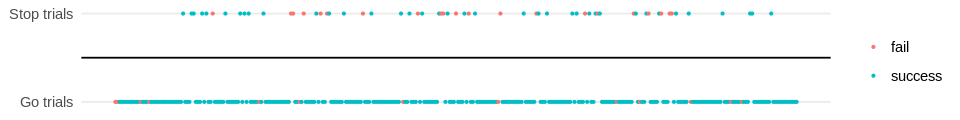

In [10]:
plotRuleData <- dataTest %>% transmute(x=1:nrow(dataTest), y=trialType-1, 
                                 reward = fct_recode(factor(isRewarded), fail = '0', success = '1'))
options(repr.plot.width = 8, repr.plot.height = 1)
ggplot(plotRuleData, aes(x, y, color = reward)) + geom_point(size = 0.5)+
    geom_hline(yintercept = 0.5)+
    scale_x_continuous(name = NULL)+
    scale_y_continuous(name = NULL, breaks = c(0, 1), labels = c("Go trials", "Stop trials"))+
    scale_color_discrete(name = NULL)+theme_minimal()+
    theme(axis.ticks.x = element_blank(), axis.text.x = element_blank(), panel.grid.minor.x = element_blank(),
          panel.grid.major.x = element_blank())

Tidy data to get regressors:

In [215]:
createPast_n_table<-function(t) 
    mutate(dt, past_n_Rule = lag(currentRule, t), past_n_rewarded = lag(currentSuccess, t), 
           isPast_n_SameRule = as.numeric(currentRule - past_n_Rule == 0), isPast_n_DiffRule = 1-isPast_n_SameRule) %>% 
    transmute(past_n_sameRule_isRewarded = isPast_n_SameRule * past_n_rewarded, 
              past_n_diffRule_isRewarded = isPast_n_DiffRule * past_n_rewarded) %>% 
    rename_all(~list(paste('past', t, 'sameRule', 'isRewarded', sep = '_'), 
                     paste('past', t, 'diffRule', 'isRewarded', sep = '_')))
get_regressors <- function(data_set, T){
    dt <- data_set %>% transmute(trialID = row_number(), currentRule = trialType - 1,
                                 currentReward = isRewarded)
    dt <- map_dfc(1:T, createPast_n_table) %>% bind_cols(dt, .)
    return(dt)
}
get_regressors(dataTest, 3) # try generate regressors data frame from past 3 trials

trialID,currentRule,currentReward,past_1_sameRule_isRewarded,past_1_diffRule_isRewarded,past_2_sameRule_isRewarded,past_2_diffRule_isRewarded,past_3_sameRule_isRewarded,past_3_diffRule_isRewarded
1,0,0,NA,NA,NA,NA,NA,NA
2,0,0,-1,0,NA,NA,NA,NA
3,0,1,-1,0,-1,0,NA,NA
4,0,1,1,0,-1,0,-1,0
5,0,1,1,0,1,0,-1,0
6,0,1,1,0,1,0,1,0
7,0,1,1,0,1,0,1,0
8,0,1,1,0,1,0,1,0
9,0,1,1,0,1,0,1,0
10,0,1,1,0,1,0,1,0


# Behavior Model

## Logistic regression model

$$ P(reward)=lapse+\frac{1-2lapse}{1+e^{-A}} $$
$$A=\beta_0+\sum_{t=1}^T [\beta_{rule}(t)R(t)+\beta_{success}(t)S(t)+\beta_{failure}(t)F(t)]$$

where $T$ is the number of trials in the past; $R(t)\in\{+1, -1\}$ if the rule on that trial is "stop" or "go", $S(t), F(t)\in\{+1, -1\}$ if a trial is success or failure.

In [90]:
regData<-get_regressors(dataTest, 3) %>% 
    filter_all(all_vars(!is.na(.))) %>% mutate(currentReward = factor(currentReward)) 

In [92]:
testModel <- multinom(currentReward ~ . - trialID, regData)

# weights:  9 (8 variable)
initial  value 221.807098 
iter  10 value 80.897340
final  value 80.742181 
converged


In [96]:
testSum <- summary(testModel)
testSum

Call:
multinom(formula = currentReward ~ . - trialID, data = regData)

Coefficients:
                               Values Std. Err.
(Intercept)                 4.5360252 0.8725791
currentRule                -4.3146635 1.1082715
past_1_sameRule_isRewarded -0.4181306 0.4571881
past_1_diffRule_isRewarded  0.5449334 0.4999870
past_2_sameRule_isRewarded -1.0048171 0.6482511
past_2_diffRule_isRewarded -0.4151353 0.6080958
past_3_sameRule_isRewarded -0.3310093 0.5546984
past_3_diffRule_isRewarded  0.4460981 0.4981543

Residual Deviance: 161.4844 
AIC: 177.4844 

Use z-test to compute p-value:

In [210]:
testZ <- testSum$coefficients/testSum$standard.errors
testPval <- (1 - pnorm(abs(testZ), 0, 1)) * 2 # compute p-value from normal distribution
testPval

(Intercept)                currentRule 
              2.009989e-07               9.895222e-05 
past_1_sameRule_isRewarded past_1_diffRule_isRewarded 
              3.604174e-01               2.757593e-01 
past_2_sameRule_isRewarded past_2_diffRule_isRewarded 
              1.211312e-01               4.948085e-01 
past_3_sameRule_isRewarded past_3_diffRule_isRewarded 
              5.506827e-01               3.705189e-01

relative risk ratio:

In [105]:
exp(coef(testModel))

(Intercept)                currentRule 
               93.31913695                 0.01337105 
past_1_sameRule_isRewarded past_1_diffRule_isRewarded 
                0.65827625                 1.72449361 
past_2_sameRule_isRewarded past_2_diffRule_isRewarded 
                0.36611160                 0.66025092 
past_3_sameRule_isRewarded past_3_diffRule_isRewarded 
                0.71819849                 1.56220465

In [272]:
predTest <- regData %>% select(trialID, currentRule, currentReward) %>% 
    mutate(pPredict = as.double(fitted(testModel)), currentRulePred = as.numeric(pPredict >= 0.5),
           currentReward = as.numeric(currentReward) - 1)
predTest

trialID,currentRule,currentReward,pPredict,currentRulePred
4,0,1,0.9957379,1
5,0,1,0.9690543,1
6,0,1,0.9416991,1
7,0,1,0.9416991,1
8,0,1,0.9416991,1
9,0,1,0.9416991,1
10,0,1,0.9416991,1
11,0,1,0.9416991,1
12,0,1,0.9416991,1
13,0,0,0.9416991,1


In [249]:
with(predTest, mean(currentReward == currentRulePred))

[1] 0.903125

For all trials, the __precision__ of the model is 0.903.

In [327]:
predTest %>% filter(currentRule == 1) %>% summarise(correctPredict = mean(currentReward == currentRulePred))

correctPredict
0.6610169


For __stop__ trials, the __precision__ of the model is about __0.66__.

Another way to evaluate predicted precision is to use __Kendall's Tau Correlation Coefficient__:

In [288]:
cor.test(~pPredict + currentReward, predTest, method = "kendall")


	Kendall's rank correlation tau

data:  pPredict and currentReward
z = 5.9308, p-value = 3.014e-09
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.2894287 


P-value < 0.001, predicted reward is correlated with current reward.

For stop trials only:

In [301]:
cor.test(~pPredict + currentReward, predTest, method = "kendall", subset = currentRule == 1)


	Kendall's rank correlation tau

data:  pPredict and currentReward
z = 1.8508, p-value = 0.06419
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.2168798 


For stop trials only, predicted values are not correlated with current values.

Plot predicted probalility from some trials:

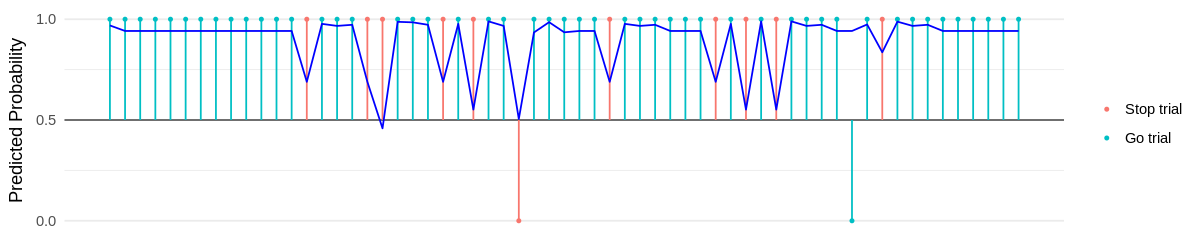

In [284]:
dataPlotPredTest <- predTest %>% filter(between(trialID, 20, 80)) %>% 
    mutate(currentRule = fct_shift(factor(currentRule)))
options(repr.plot.width = 10, repr.plot.height = 2)
ggplot(dataPlotPredTest, aes(x = trialID, y = currentReward, color = currentRule)) + geom_point(size = 0.75)+
    geom_hline(yintercept = 0.5, size = 0.3) + geom_linerange(aes(ymax = currentReward), ymin = 0.5, show.legend = F)+
    geom_line(aes(y = pPredict, color = NULL), colour = 'blue')+
    scale_color_discrete(name = NULL, labels = c("Stop trial", "Go trial"))+
    scale_y_continuous(name = "Predicted Probability", breaks = c(0, 0.5, 1))+
    scale_x_continuous(name = NULL, breaks = NULL)+
    theme_minimal()

### Try different number of past trials

In [460]:
# wrapping computation above as a function
logicModelPredict <- function(pastT, regData){
    multinomQuiet <- quietly(multinom)
    testModel <- multinomQuiet(currentReward ~ . - trialID, regData, model = TRUE) %>% pluck("result")
    testSum <- summary(testModel)
    pVal <- tidy(testSum$coefficients) %>% rename_all(~c("regressor", "coefficient")) %>% 
        mutate(std_err = testSum$standard.errors, 
               pValue = (1 - pnorm(abs(coefficient / std_err), 0, 1)) * 2)
    predTest <- regData %>% select(trialID, currentRule, currentReward) %>% 
        mutate(pPredict = as.double(fitted(testModel)), currentRulePred = as.numeric(pPredict >= 0.5),
               currentReward = as.numeric(currentReward) - 1)
    corTest <- cor.test(~pPredict + currentReward, predTest, method = "kendall")
    corTestStop <- cor.test(~pPredict + currentReward, predTest, method = "kendall", subset = currentRule == 1)
    res1 <- corTest %>% tidy() %>% select(p.value, estimate) %>% rename_at(2, ~"tau")
    res2 <- corTestStop %>% tidy() %>% select(p.value, estimate) %>%
        rename_all(~c("stopTrial.p.value", "stopTrial.tau"))
    res3 <- predTest %>% summarise(precision = mean(currentReward == currentRulePred))
    res4 <-predTest %>% filter(currentRule == 1) %>% 
        summarise(stopTrial.precision = mean(currentReward == currentRulePred))
    corRes <- bind_cols(res1, res3, res2, res4)
    return(list(coefficientSum = pVal, predict = predTest, modelSum = corRes))
    # return (1) coefficient summary information, (2) predicted data, (3) model prediction summary.
}

In [397]:
tidyPastTrial <- . %>% map2(1:10, ~add_column(.x, pastTrial = .y, .before = 1)) %>% reduce(bind_rows)
pastNModels <- 1:10 %>% map(logicModelPredict, regData) %>% transpose() %>% map(tidyPastTrial)

In [398]:
pastNModels$modelSum

pastTrial,p.value,tau,precision,stopTrial.p.value,stopTrial.tau,stopTrial.precision
1,1.047157e-07,0.2779638,0.9006211,0.039052672,0.2623947,0.6610169
2,1.095922e-08,0.2870312,0.9096573,0.041073253,0.2458762,0.6949153
3,3.014137e-09,0.2894287,0.9031250,0.064191845,0.2168798,0.6610169
4,3.512657e-09,0.2828211,0.9028213,0.071090048,0.2036270,0.6610169
5,3.279069e-09,0.2797862,0.9119497,0.092958667,0.1877348,0.7118644
6,9.972447e-10,0.2866627,0.9053628,0.022035796,0.2522888,0.6779661
7,8.591472e-10,0.2862143,0.9050633,0.032134951,0.2348725,0.6779661
8,1.677364e-10,0.2971257,0.9015873,0.024392375,0.2452801,0.6610169
9,1.747158e-10,0.2963964,0.9076433,0.009385540,0.2820250,0.6949153
10,5.937998e-11,0.3038256,0.9105431,0.004249892,0.3103079,0.7118644


For models of past trial number from 1 to 10:
- Prediction is significantly correlated to experiment value for all trials, but for stop trials, only when past trial number >= 6, prediction is significant.

- All model's prediction is positive correlated to experiment value (tau > 0) but not strongly positive (tau is around 0.2 - 0.3).

- For stop trials, the prediction precitions are not high (~ 0.6).

In [400]:
pastNModels$coefficientSum %>% filter(pValue < 0.05)

pastTrial,regressor,coefficient,std_err,pValue
1,(Intercept),3.086144,0.4271257,4.998224e-13
1,currentRule,-2.860116,0.6146698,3.269914e-06
2,(Intercept),4.293696,0.7799869,3.695222e-08
2,currentRule,-3.588528,0.8442303,2.131508e-05
3,(Intercept),4.536025,0.8725791,2.009989e-07
3,currentRule,-4.314663,1.1082715,9.895222e-05
4,(Intercept),4.467594,0.9104187,9.239230e-07
4,currentRule,-4.496838,1.1922677,1.621602e-04
5,(Intercept),4.447202,0.9681734,4.360944e-06
5,currentRule,-4.333649,1.2428767,4.888575e-04


For all models, no coefficient significantly influence current reward, except for __current rule__ (go trial or stop trial) and __intercept__.

__Intercept__ is significant for all models indicate that more factors affecting reward should be considered.

### Add continuous trial number

Modify
$$A=\beta_0+\sum_{t=1}^T [\beta_{rule}(t)R(t)+\beta_{success}(t)S(t)+\beta_{failure}(t)F(t)]$$
to
$$A=\beta_0+\sum_{t=1}^T [\beta_{rule}(t)R(t)+\beta_{success}(t)S(t)+\beta_{failure}(t)F(t)]+\beta_{C}C$$
where $\beta_{C}$ is the coefficient of $C$, and $C$ is continous trials that has the same rule as current trial.

In [449]:
regDataConti <- dataTest %>% get_regressors(6) %>% 
    mutate(continuousRule = accumulate(currentRule - lag(currentRule, 1, default = currentRule[1] - 1),
                                       ~if_else(.y==0, .x+1, 1))) %>% 
    filter_all(all_vars(!is.na(.))) %>% mutate(currentReward = factor(currentReward)) 

In [462]:
logicModelPredict(3, regDataConti)

regressor,coefficient,std_err,pValue
(Intercept),4.82288372,1.11490636,1.519658e-05
currentRule,-5.30913404,1.43965570,2.262188e-04
past_1_sameRule_isRewarded,-0.45380406,0.48417393,3.486172e-01
past_1_diffRule_isRewarded,0.56866127,0.50413780,2.593251e-01
past_2_sameRule_isRewarded,-1.15228628,0.66639705,8.378606e-02
past_2_diffRule_isRewarded,-0.43277296,0.62623692,4.895221e-01
past_3_sameRule_isRewarded,-0.42021326,0.58899630,4.755738e-01
past_3_diffRule_isRewarded,0.57005362,0.51290337,2.663855e-01
past_4_sameRule_isRewarded,0.08649311,0.42682675,8.394147e-01
past_4_diffRule_isRewarded,0.21570086,0.45855054,6.380713e-01


Continous trials has no contribution to reward.